## Importing libraries

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Preparing data

Since the dataset is split into **multiple files**, I'm going to read file-by-file and save them to a list so that I can concatenate them together for later analysis.

In [354]:
pieces = []
for year in range(1880, 2024):
    path = f'datasets/yob{year}.txt'
    frame = pd.read_csv(path, sep=',', names=['name', 'sex', 'births'])
    # assign the year to the frame
    frame['year'] = year
    # append the frame to pieces
    pieces.append(frame)

# concatenate the pieces into a single DataFrame
names = pd.concat(pieces, ignore_index=True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


Now we have a single DataFrame containing all of the names data across all years, let's start aggregating the data at the year and sex level using *groupby* or *pivot_table*

In [355]:
total_births = names.pivot_table(values='births', index='year', columns='sex', aggfunc="sum")
total_births.tail()

sex,F,M
year,,
2019,1676568,1792223
2020,1614196,1723649
2021,1638188,1746499
2022,1636657,1741954
2023,1596022,1701224


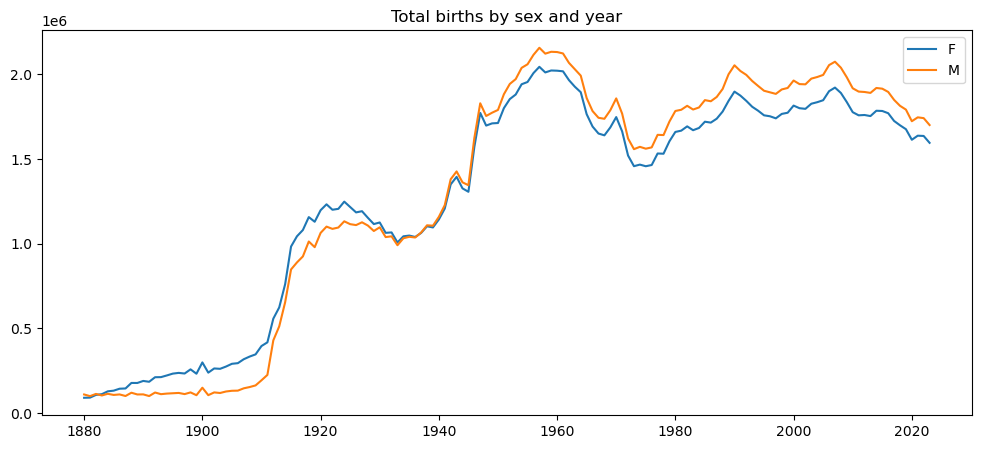

In [356]:
plt.figure(figsize=(12, 5))
plt.plot(total_births)
plt.title('Total births by sex and year')
plt.legend(['F', 'M'])
plt.show()

Let's insert a column prop with the fraction of babies given each name relative to that year for that sex. For example, a prop of 0.03 would indicate that 3 out of 100 babies were given a particular name. 

In [357]:
# create a function to calculate the fraction for a particular name

def add_prop(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

# apply the function to each group of year-sex combination
names = names.groupby(['year', 'sex']).apply(add_prop, include_groups=False).reset_index(level=['year', 'sex'])
names.head()

,year,sex,name,births,prop
0,1880,F,Mary,7065,0.077642
1,1880,F,Anna,2604,0.028617
2,1880,F,Emma,2003,0.022012
3,1880,F,Elizabeth,1939,0.021309
4,1880,F,Minnie,1746,0.019188


It's always better to do a sanity check such as verifying that the prop column sums to 1 within all the groups

In [358]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2021  M      1.0
2022  F      1.0
      M      1.0
2023  F      1.0
      M      1.0
Name: prop, Length: 288, dtype: float64

For further analysis, I just care about top 1000 names within each group

In [359]:
def get_top1000(group):
    return group.sort_values('births', ascending=False)[:1000]
top_1000 = names.groupby(['year', 'sex']).apply(get_top1000)

top_1000.head()

C:\Users\tamqu\AppData\Local\Temp\ipykernel_18392\234906276.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_1000 = names.groupby(['year', 'sex']).apply(get_top1000)


year sex       name  births      prop
year sex                                         
1880 F   0  1880   F       Mary    7065  0.077642
         1  1880   F       Anna    2604  0.028617
         2  1880   F       Emma    2003  0.022012
         3  1880   F  Elizabeth    1939  0.021309
         4  1880   F     Minnie    1746  0.019188

In [360]:
top_1000 = top_1000.reset_index(drop=True)

In [361]:
top_1000.tail()

,year,sex,name,births,prop
287871,2023,M,Thatcher,220,0.000129
287872,2023,M,Abner,219,0.000129
287873,2023,M,Cullen,219,0.000129
287874,2023,M,Damari,219,0.000129
287875,2023,M,Hollis,219,0.000129


In [362]:
top_1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287876 entries, 0 to 287875
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   year    287876 non-null  int64  
 1   sex     287876 non-null  object 
 2   name    287876 non-null  object 
 3   births  287876 non-null  int64  
 4   prop    287876 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 11.0+ MB


## Analyzing Naming Trends

Simple like **time series**, like the number of Johns or Marrys for each year can be plotted. Let's form a pivot table of the total number of births by year and name.

In [363]:
total_births = top_1000.pivot_table('births', index='year', columns='name', aggfunc='sum')
total_births.head()

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Aayan,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,7.0,NaN,8.0,28.0,NaN,27.0,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN


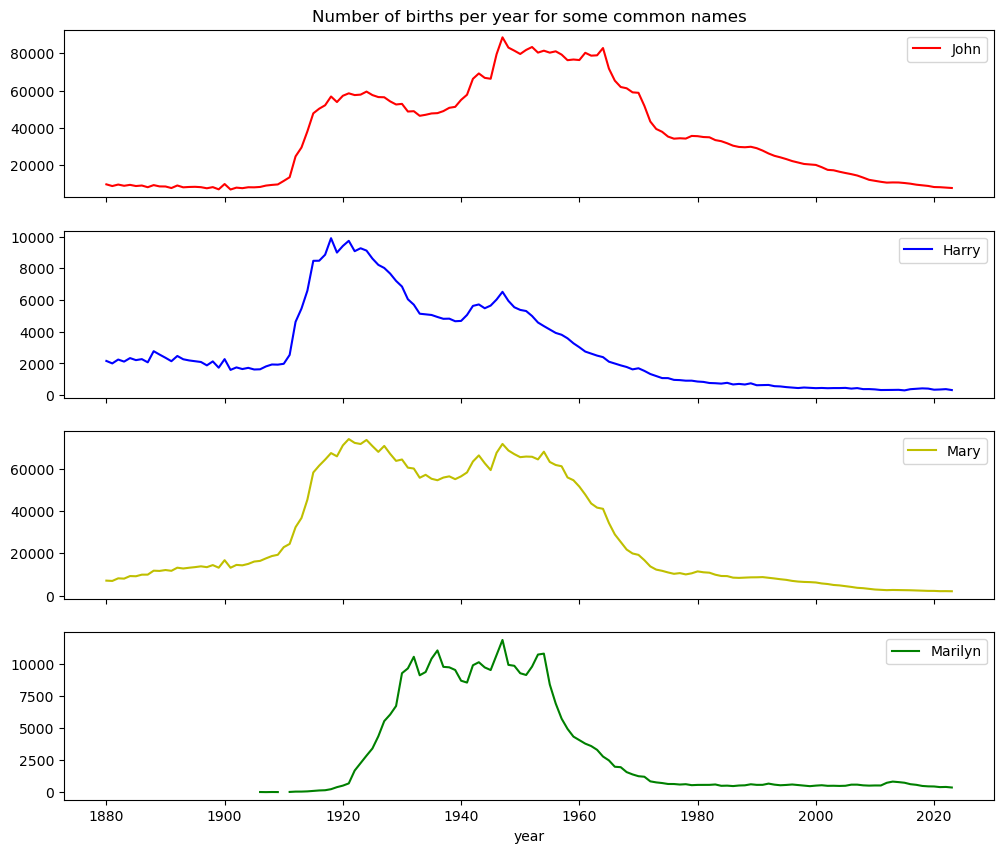

In [364]:
# Get subsets of common names and plot them
name_list = ["John", "Harry", "Mary", "Marilyn"]
color_list = ['r', 'b', 'y', 'g']
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
# subset.plot(subplots=True, figsize=(12, 10), title='Number of births per year for some common names') 
fig, ax = plt.subplots(len(name_list), 1, figsize=(12, 10), sharex=True)
for i in range(len(name_list)):
    subset.iloc[:, i].plot(ax=ax[i], c=color_list[i], legend=True)
ax[0].set_title('Number of births per year for some common names')
plt.show()

**From the image**, we might see that these names have grown out of favor with the American population. But let's do more analysis to reveal to story behind that.

## Measuring the increase in naming diversity

One explanation for the decrease in plots is that fewer parents are choosing the common names for their children. This hypothesis can be explore and confirmed in the data. One measure is the proportion of births represented by the top 1,000 most popular names, which I aggregate and plot by year and sex.

<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

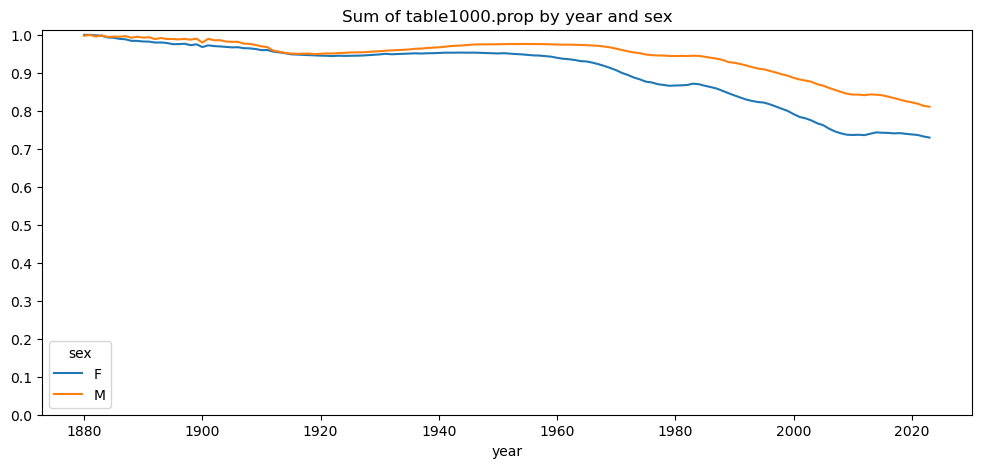

In [365]:
table = top_1000.pivot_table('prop', index='year', columns='sex', aggfunc='sum')
table.plot(yticks=np.linspace(0, 1, 11), figsize=(12, 5), title='Sum of table1000.prop by year and sex')

**From the image**, indeed, there appears to be increasing name diversity (decrease total of proportion in top 1000).

Another interesting *metric* is the number of distinct names, taken in order of popularity from highest to lowest, in top 50% of births. Let's consider just the boys names in from 2010

In [366]:
df = top_1000[(top_1000['sex'] == 'M') & (top_1000['year'] == 2010)]
df.head()

,year,sex,name,births,prop
260876,2010,M,Jacob,22148,0.011547
260877,2010,M,Ethan,18015,0.009392
260878,2010,M,Michael,17376,0.009059
260879,2010,M,Jayden,17198,0.008966
260880,2010,M,William,17068,0.008898


After sorting prop in descending order, we want to know how many of the most popular names it takes to reach 50%. And then calling method *searchsorted* returns the position in the cumulative sum at which 0.5 would need to be inserted to keep it in order.


In [367]:
prop_cumsum = df.sort_values('prop', ascending=False)['prop'].cumsum()

In [368]:
prop_cumsum.head()

260876    0.011547
260877    0.020939
260878    0.029997
260879    0.038963
260880    0.047862
Name: prop, dtype: float64

In [369]:
prop_cumsum.searchsorted(0.5)+1

117

Since arrays are zero-indexed, adding 1 to this result gives you a result of 117. By contrast, in 1900 this number was much smaller

In [370]:
df = top_1000[(top_1000['sex'] == 'M') & (top_1000['year'] == 1900)]
prop_cumsum = df.sort_values('prop', ascending=False)['prop'].cumsum()
prop_cumsum.searchsorted(0.5) + 1

25

We can create a function to do the exact same thing for each group of sex and year

In [371]:
def get_quantile_count(group, p=0.5):
    group.sort_values('prop', ascending=False)
    return group['prop'].cumsum().searchsorted(p) + 1

diversity = top_1000.groupby(['year', 'sex']).apply(get_quantile_count, include_groups=False)
diversity.head()

year  sex
1880  F      38
      M      14
1881  F      38
      M      14
1882  F      38
dtype: int64

In [372]:
diversity = diversity.unstack() # used to pivot a level of a multi-indexed DataFrame or Series to its columns
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2019,265,155
2020,272,163
2021,276,167


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

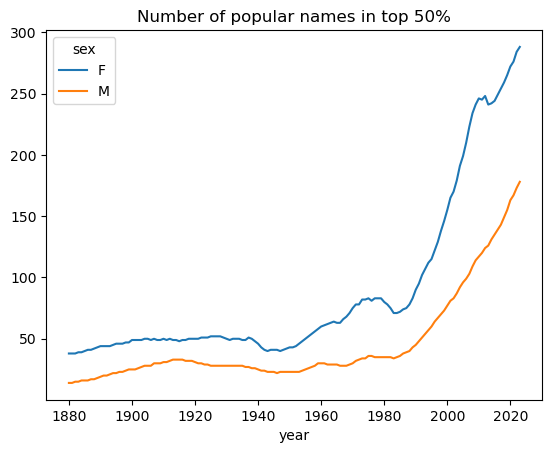

In [373]:
diversity.plot(title="Number of popular names in top 50%")

**From the image**, girl names have always been more diverse than boy names, and they
have only become more so over time.

## The "last letter" revolution

In [374]:
def get_last_letter(x):
    return x[-1]

last_letters = names['name'].map(get_last_letter)
# last_letters.name = 'last_letter'

table = names.pivot_table("births", index=last_letters, columns=["sex", "year"], aggfunc='sum')
table.head()

sex         F                                                                 \
year     1880     1881     1882     1883     1884     1885     1886     1887   
name                                                                           
a     31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0  48942.0   
b         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c         NaN      NaN      5.0      5.0      NaN      NaN      NaN      NaN   
d       609.0    607.0    734.0    810.0    916.0    862.0   1007.0   1027.0   
e     33381.0  34080.0  40399.0  41914.0  48089.0  49616.0  53883.0  54353.0   

sex                     ...         M                                          \
year     1888     1889  ...      2014      2015      2016      2017      2018   
name                    ...                                                     
a     59440.0  58631.0  ...   28335.0   29079.0   29798.0   30370.0   31000.0   
b         NaN      NaN  ...   31436.0   29662.0   27039.0   24623.0   22760.0   
c         NaN      NaN  ...   23863.0   23171.0   22100.0   20612.0   19523.0   
d      1298.0   1374.0  ...   44110.0   43856.0   43084.0   42194.0   41909.0   
e     66748.0  66662.0  ...  132297.0  128818.0  126304.0  122256.0  120355.0   

sex                                                     
year      2019      2020      2021      2022      2023  
name                                                    
a      32583.0   33916.0   37503.0   40138.0   41463.0  
b      20770.0   18138.0   17489.0   16411.0   15272.0  
c      18646.0   16708.0   16122.0   15440.0   14658.0  
d      40856.0   38978.0   39503.0   39309.0   38032.0  
e     118972.0  116795.0  120106.0  120127.0  117410.0  

[5 rows x 288 columns]

In [375]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable

sex          F                            M                    
year      1910      1960      2010     1910      1960      2010
name                                                           
a     108399.0  691262.0  677461.0    977.0    5217.0   28900.0
b          NaN     694.0     455.0    411.0    3913.0   39311.0
c          5.0      49.0     958.0    482.0   15454.0   23373.0
d       6751.0    3731.0    2645.0  22111.0  262108.0   44871.0
e     133599.0  434981.0  317085.0  28665.0  178757.0  130374.0
f          NaN      20.0      97.0    152.0    9231.0    2313.0
g         57.0     316.0     669.0    439.0   20228.0    2699.0
h      20432.0   73235.0  135076.0   8849.0   80836.0   99426.0
i        605.0   80806.0   56329.0    164.0    1298.0   43488.0
j          NaN       NaN     165.0      NaN       NaN    1483.0
k         48.0     314.0     633.0   7104.0  105263.0   35543.0
l      17124.0   68489.0   46893.0  12628.0  223609.0  135136.0
m        476.0   17412.0    4620.0  11273.0   72138.0   47390.0
n      31418.0  264207.0  248864.0  27847.0  325164.0  695135.0
o        663.0    4930.0    2216.0   3314.0   27363.0   81625.0
p          7.0      47.0      35.0    616.0   12100.0    2433.0
q          NaN       NaN      53.0      NaN       NaN     345.0
r       5311.0   13679.0   32066.0  12521.0   66202.0  167632.0
s      15478.0   25795.0   23703.0  25402.0  218950.0  124980.0
t      10877.0   30725.0   13927.0  14155.0  139953.0   43846.0
u        271.0    1162.0     739.0     24.0     121.0    2354.0
v          NaN     122.0     208.0     22.0      77.0    2782.0
w          8.0      63.0    2114.0   1228.0   16426.0   31040.0
x          6.0      74.0    1298.0    770.0    3947.0   16493.0
y      44002.0  308445.0  207462.0  15021.0  343286.0  111651.0
z        966.0    1330.0    1243.0     33.0     392.0    3509.0

In [376]:
subtable.sum()

sex  year
F    1910     396503.0
     1960    2021888.0
     2010    1777014.0
M    1910     194208.0
     1960    2132033.0
     2010    1918132.0
dtype: float64

In [379]:
letter_prop = subtable.div(subtable.sum())
letter_prop.head()

sex          F                             M                    
year      1910      1960      2010      1910      1960      2010
name                                                            
a     0.273388  0.341889  0.381236  0.005031  0.002447  0.015067
b          NaN  0.000343  0.000256  0.002116  0.001835  0.020494
c     0.000013  0.000024  0.000539  0.002482  0.007248  0.012185
d     0.017026  0.001845  0.001488  0.113852  0.122938  0.023393
e     0.336943  0.215136  0.178437  0.147599  0.083843  0.067969

<Axes: title={'center': 'Female'}, xlabel='name'>

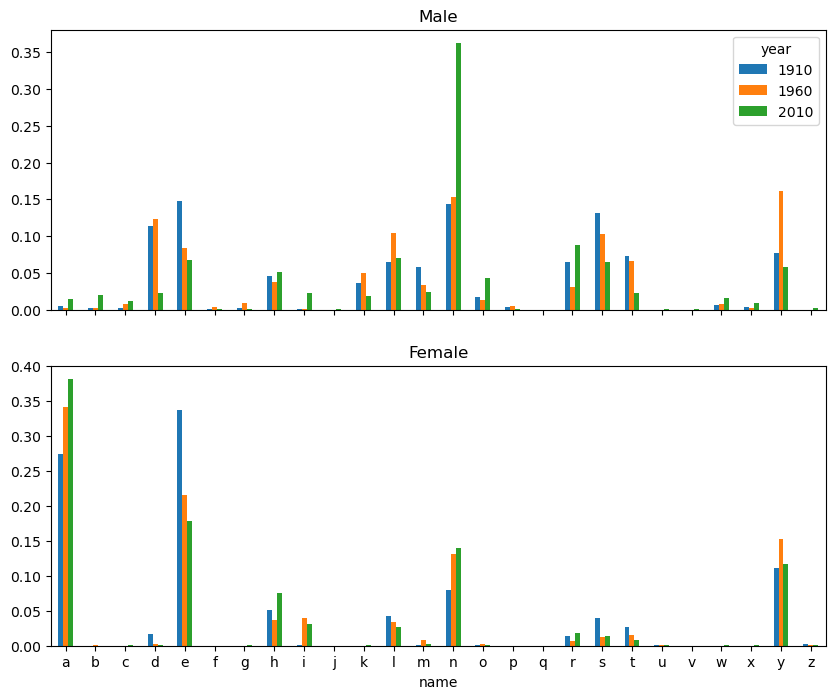

In [397]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
letter_prop['M'].plot(kind='bar', ax=ax[0], title='Male')
letter_prop['F'].plot(kind='bar', ax=ax[1], title='Female', rot=0, legend=False)

As you can see, boy names ending in n have experienced significant growth since the 1960s

Going back to the full table created before, I normalize by year and sex and select a subset of letters for the boy names, finally transposing to make each column a time series

In [404]:
letter_prop = table.div(table.sum())
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts

name,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083238,0.153214,0.077461
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408
...,...,...,...
2019,0.022796,0.323711,0.048086
2020,0.022614,0.314545,0.047825
2021,0.022618,0.306151,0.047661


<Axes: title={'center': 'Proportion of boys born with names ending d/n/y over time'}, xlabel='year'>

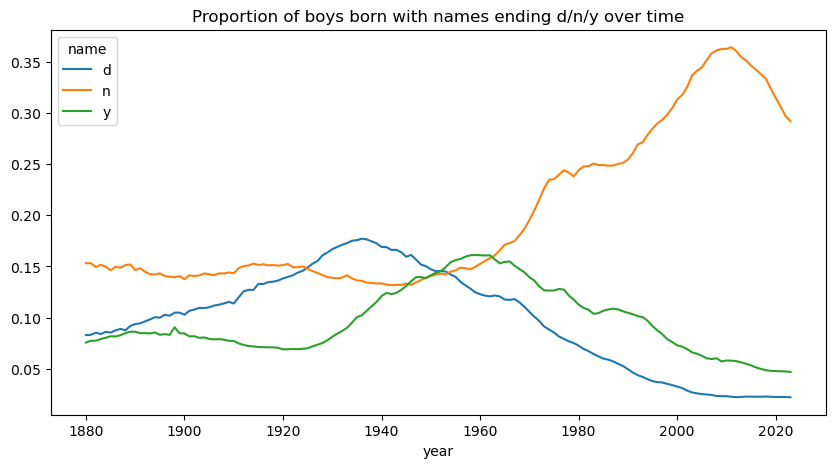

In [413]:
dny_ts.plot(title='Proportion of boys born with names ending d/n/y over time', figsize=(10, 5))

## Boy names that became girl names (and vice versa)

One fun trend is that names that were more popular with one gender earlier in the sample but have become preferred as a name for the other gender. Going back to top_1000 data frame to check it

In [429]:
all_names = pd.Series(top_1000['name'].unique())
lesley_like = all_names[all_names.str.contains('Lesl')]
print(lesley_like)
filtered = top_1000[top_1000['name'].isin(lesley_like)]
filtered


632     Leslie
2293    Lesley
4263    Leslee
4730     Lesli
6102     Lesly
dtype: object


,year,sex,name,births,prop
632,1880,F,Leslie,8,0.000088
1108,1880,M,Leslie,79,0.000715
2461,1881,F,Leslie,11,0.000120
3014,1881,M,Leslie,92,0.000913
4511,1882,F,Leslie,9,0.000083
...,...,...,...,...,...
278413,2019,F,Leslie,571,0.000341
280472,2020,F,Leslie,487,0.000302
282496,2021,F,Leslie,477,0.000291
284528,2022,F,Leslie,453,0.000277


In [446]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
print(table)
table.div(table.sum(axis=1), axis='index')

sex       F      M
year              
1880    8.0   79.0
1881   11.0   92.0
1882    9.0  128.0
1883    7.0  125.0
1884   15.0  125.0
...     ...    ...
2019  571.0    NaN
2020  487.0    NaN
2021  477.0    NaN
2022  453.0    NaN
2023  439.0    NaN

[144 rows x 2 columns]


sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2019,1.000000,NaN
2020,1.000000,NaN
2021,1.000000,NaN


<Axes: xlabel='year'>

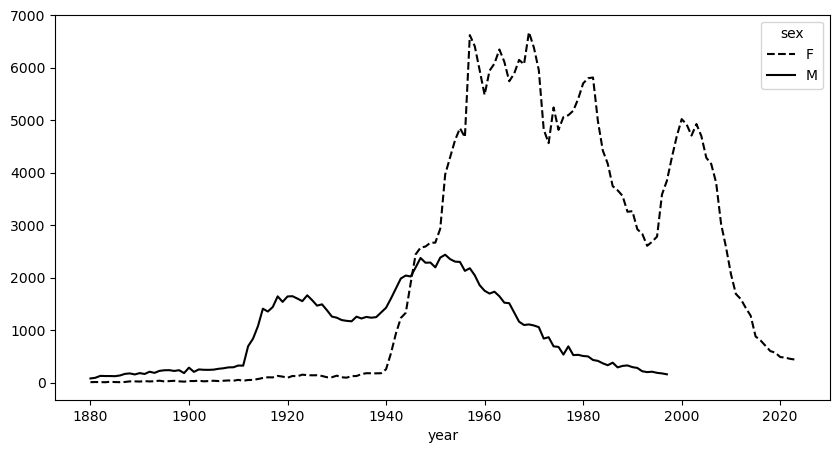

In [450]:
table.plot(style={"M": "k-", "F": "k--"}, figsize=(10, 5))